# Covid-19 Growth in NYS Prisons


In [28]:
#import numpy and data science package
import matplotlib
matplotlib.use('Agg')
import datascience.util
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import mean
plt.style.use('fivethirtyeight')

In [51]:
import math
import datascience


In [35]:
#describing the table
covid = Table.read_table('DOCCS DATA - Data Fest Table (2).csv')
covid = covid.take(np.arange(1,covid.num_rows))
covid = covid.where("Date", datascience.are.not_equal_to("23-Apr"))
covid = covid.with_column('Day #',np.arange(1,30))

log_prison = covid.apply(math.log,'Prison Pos. Cases')
log_nys = covid.apply(math.log,'NYS Total Pos. Cases')
covid = covid.with_columns('Log Prison Cases',log_prison,'Log NYS Cases',log_nys)
covid

Date,Prison Pos. Cases,Prison Pos. Slope,NYS Total Pos. Cases,NYS Total Pos. Slope,Day #,Log Prison Cases,Log NYS Cases
20-Apr,219,0.0379147,253060,0.021165,1,5.38907,12.4414
21-Apr,239,0.0913242,258361,0.0209476,2,5.47646,12.4621
22-Apr,263,0.100418,263292,0.0190857,3,5.57215,12.481
24-Apr,287,0.0669145,271590,0.0308586,4,5.65948,12.512
25-Apr,296,0.0313589,282143,0.0388564,5,5.69036,12.5502
26-Apr,310,0.0472973,288045,0.0209185,6,5.73657,12.5709
27-Apr,330,0.0645161,291996,0.0137166,7,5.79909,12.5845
28-Apr,343,0.0393939,295106,0.0106508,8,5.83773,12.5951
29-Apr,370,0.0787172,299691,0.0155368,9,5.9135,12.6105
30-Apr,375,0.0135135,304372,0.0156194,10,5.92693,12.626


Null Hypothesis: The slope of the covid growth rate in prisons (in NYS) is the same as the slope of the covid growth rate in the rest of NYS.
Alternative Hypothesis: The slope of the covid growth rate in prisons is greater than the slope of the covid growth rate in the rest of NYS.

Test Statistic: The slope of covid growth rate in prisons / the slope of covid growth rate in the rest of NYS

Null hypothesis: test statistic = 1

Alt hypothesis: test statistic > 1


In [19]:
def slope(d, c, table):
    day = table.column(d)
    cases = table.column(c)
    m = ((np.mean(day)*np.mean(cases))-np.mean(day*cases))/((np.mean(day)**2)-np.mean(day**2))
    return m
    

In [36]:
#bootstrap

test_statistics = datascience.make_array()

for i in np.arange(500):
    bootstrap = covid.sample(covid.num_rows, with_replacement = True)
    bootstrap = bootstrap.sort('Day #')
    prison_slope = slope('Day #','Log Prison Cases',bootstrap)
    nys_slope = slope('Day #', 'Log NYS Cases',bootstrap)
    test_statistics = np.append(prison_slope/nys_slope, test_statistics)

test_statistics    

array([2.05466878, 1.92597508, 2.03369541, 2.07290222, 2.02244813,
       1.93918554, 2.12384837, 2.06357553, 2.20169166, 1.95908388,
       2.09430984, 2.03359084, 2.08071485, 2.05998421, 2.05883011,
       2.16852652, 2.03399771, 2.07624168, 2.13550798, 2.03945452,
       2.02964709, 1.97781835, 2.11985486, 2.17634366, 1.96279121,
       1.93511986, 2.12317344, 2.00597169, 1.83947704, 1.88693131,
       2.08847022, 2.12147644, 2.1758277 , 1.86454842, 2.05168058,
       2.03622009, 2.02725434, 2.19213342, 1.93828009, 2.11105704,
       1.99935963, 1.86910395, 1.95720225, 2.11593325, 1.9721454 ,
       2.0501945 , 2.0062174 , 2.13462515, 2.04577073, 1.92345168,
       2.13164523, 1.88362787, 2.06429519, 1.99934623, 2.02669371,
       1.97245524, 1.88246533, 2.11121303, 2.06293425, 2.05707442,
       1.9942458 , 2.03475043, 2.0932301 , 2.02012557, 1.91434171,
       2.08046209, 2.0700143 , 1.86482556, 1.88234241, 1.90941168,
       1.99210184, 2.12517777, 1.88851122, 2.08658721, 2.02896

In [40]:
#find the confidence interval 
left = datascience.percentile(2.5, test_statistics)
right = datascience.util.percentile(97.5, test_statistics)

interval = datascience.util.make_array(left, right)
interval

array([1.81334033, 2.19010972])

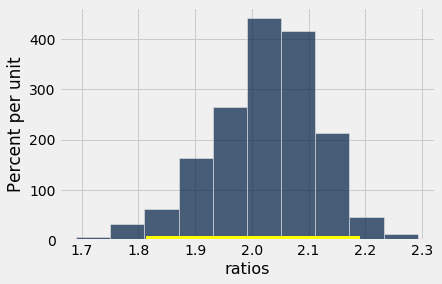

In [57]:
stats_table = Table().with_column('ratios',test_statistics)
stats_table.hist()
plt.plot(datascience.make_array(left,right),datascience.make_array(0,0),color ='yellow',lw=8)